In [ ]:
#Lab exam 2020

In [98]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import skimage.filters as fl
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray, rgba2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [13]:
def dilation(img,w,h):
    imgArr = np.array(img)
    output=np.zeros(img.shape)
    width=imgArr.shape[0]
    height=imgArr.shape[1]
    
    edgex = w//2 
    edgey = h//2
    window=np.ones([w,h])

    for i in range (edgex, (width-edgex)-1):
        for j in range (edgey, (height-edgey)-1):

            if(imgArr[i-edgex:i+edgex, j-edgey:j+edgey].any()== window.any()):  
                output[i,j]=1   
    
    return output 

In [47]:
def GammaCorrection(img , c , g):
    imgArr = np.array(img)
    
    width=imgArr.shape[1]
    height=imgArr.shape[0]
    
    output = c*(imgArr**g)

            
    return output

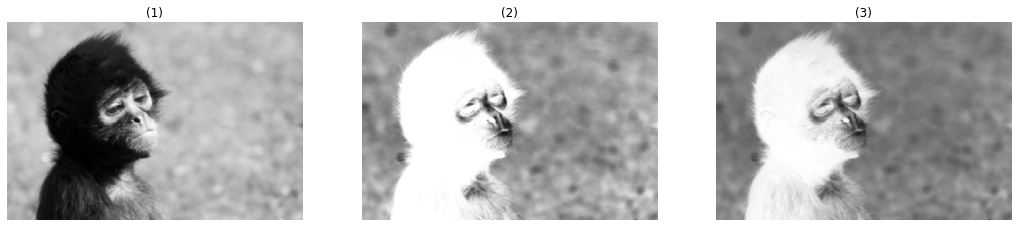

In [52]:
ex=io.imread("imgs-STD/t1/I1.jpeg")
o=io.imread("imgs-STD/t1/O1.jpeg")
ex=fl.median(ex)
out=255-ex
out=GammaCorrection(out,1,0.5)

show_images([ex,o,out])

In [104]:
def sobel_fn(img):
    hx =  np.array([
        [-1,-2,-1],
        [ 0,0,0],
        [ 1,2,1]
    ])

    hy =  np.array([
        [ -1,0,1],
        [ -2,0,2],
        [ -1,0,1]
    ])
    xImg = convolve2d(img, hx)
    yImg= convolve2d(img, hy)
    
    threshold=250
    newImg=np.sqrt(yImg**2+yImg**2) #edge strength
#     newImg=yImg
    newImg[newImg<threshold]=0
    newImg[newImg>threshold]=255
    return newImg
    
    


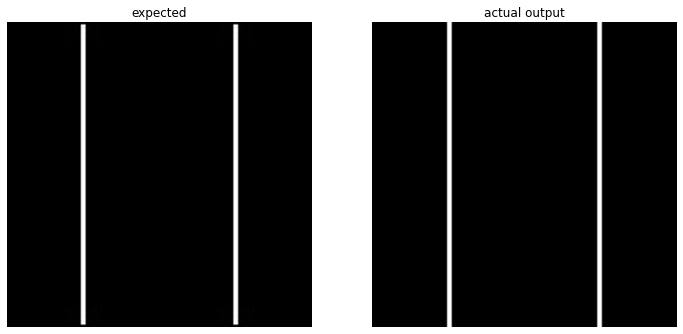

In [108]:
ex=io.imread("imgs-STD/t1/I2.jpeg")
o=io.imread("imgs-STD/t1/O2.jpeg")
th=254
ex[ex>th]=255
ex[ex<th]=0
out=sobel_fn(ex) 
show_images([o,out],["expected", "actual output"])


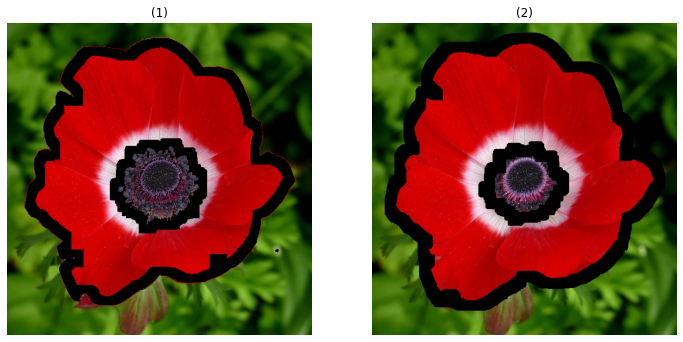

In [90]:
ex=io.imread("imgs-STD/t1/I3.jpeg")
x=io.imread("imgs-STD/t1/O3.jpeg")
ex_f=ex.astype(float)

Rchannel = ex_f[:,:,0]
Gchannel = ex_f[:,:,1]
Bchannel = ex_f[:,:,2]

T = 150
th=Rchannel<T
d=dilation(th,35,35)
diff=d-th

ex[diff==1]=0
show_images([ex,x])